In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

from math import sqrt
sns.set()

In [2]:
## load the data

In [18]:
raw_data = pd.read_csv('dataset/daily-total-female-births.csv')
df_copy = raw_data.copy()

In [19]:
df_copy.head() # data is in day-level

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [27]:
df_copy.describe() # we have data for a single year

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [21]:
# check for missing values
df_copy.isna().sum()

Date      0
Births    0
dtype: int64

In [25]:
df_copy['Date']=pd.to_datetime(df_copy['Date'])
df_copy.set_index('Date',inplace=True)

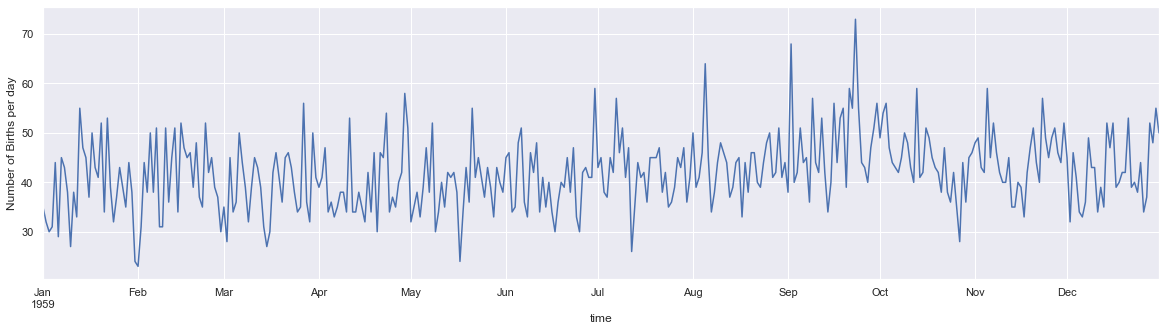

In [26]:
df_copy['Births'].plot(figsize=(20,5))
plt.xlabel('time')
plt.ylabel('Number of Births per day')
plt.show()

In [28]:
# data seems to be normally distributed around the mean of 42
## there seems to be more birth in the month of sept-october

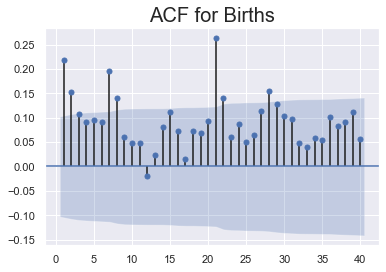

In [30]:
# plotting the autocorrelation
sgt.plot_acf(df_copy.Births,lags=40,zero=False)
plt.title('ACF for Births',size=20)
plt.show()

# more or less random ,, so no autocorreation

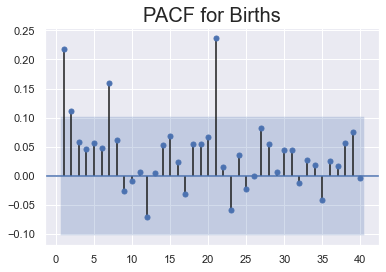

In [32]:
sgt.plot_pacf(df_copy.Births,lags=40,zero=False)
plt.title('PACF for Births',size=20)
plt.show()

## only seems to be significant upto 2nd lag

In [33]:
sts.adfuller(df_copy.Births)

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [34]:
## since p-value <0.05, we say that the data comes from the stationary process

## The AR(1) model

In [35]:
model_ar_1 = ARMA(df_copy.Births,order=(1,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(1, 0)   Log Likelihood               -1236.540
Method:                       css-mle   S.D. of innovations              7.162
Date:                Tue, 26 Jan 2021   AIC                           2479.081
Time:                        10:42:32   BIC                           2490.780
Sample:                    01-01-1959   HQIC                          2483.730
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9816      0.479     87.654      0.000      41.043      42.920
ar.L1.Births     0.2179      0.051      4.260      0.000       0.118       0.318
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.5893           +0.0000j            4.5893            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
model_ar_1 = ARMA(df_copy.Births,order=(2,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(2, 0)   Log Likelihood               -1234.182
Method:                       css-mle   S.D. of innovations              7.116
Date:                Tue, 26 Jan 2021   AIC                           2476.364
Time:                        10:42:59   BIC                           2491.963
Sample:                    01-01-1959   HQIC                          2482.563
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9835      0.537     78.149      0.000      40.931      43.036
ar.L1.Births     0.1939      0.052      3.731      0.000       0.092       0.296
ar.L2.Births     0.1139      0.052      2.179      0.029       0.011       0.216
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2313           +0.0000j            2.2313            0.0000
AR.2           -3.9335           +0.0000j            3.9335            0.5000
-----------------------------------------------------------------------------
"""

In [37]:
## the second lag is not significant 

In [38]:
model_ar_1 = ARMA(df_copy.Births,order=(3,0))
result_ar_1 = model_ar_1.fit()
result_ar_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(3, 0)   Log Likelihood               -1233.500
Method:                       css-mle   S.D. of innovations              7.102
Date:                Tue, 26 Jan 2021   AIC                           2476.999
Time:                        10:43:22   BIC                           2496.499
Sample:                    01-01-1959   HQIC                          2484.748
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9829      0.572     73.410      0.000      40.862      43.104
ar.L1.Births     0.1872      0.052      3.585      0.000       0.085       0.289
ar.L2.Births     0.1029      0.053      1.940      0.052      -0.001       0.207
ar.L3.Births     0.0615      0.053      1.169      0.242      -0.042       0.165
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7747           -0.0000j            1.7747           -0.0000
AR.2           -1.7239           -2.4881j            3.0270           -0.3464
AR.3           -1.7239           +2.4881j            3.0270            0.3464
-----------------------------------------------------------------------------
"""

In [39]:
## thus AR model alone cannot fit this dataset well,, let us use MA model as well

In [42]:
model_ar_1_ma_1 = ARMA(df_copy.Births,order=(1,1))
result_ar_1_ma_1 = model_ar_1_ma_1.fit()
result_ar_1_ma_1.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(1, 1)   Log Likelihood               -1230.453
Method:                       css-mle   S.D. of innovations              7.039
Date:                Tue, 26 Jan 2021   AIC                           2468.906
Time:                        10:45:04   BIC                           2484.505
Sample:                    01-01-1959   HQIC                          2475.105
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8279      1.354     30.898      0.000      39.175      44.481
ar.L1.Births     0.9800      0.028     35.158      0.000       0.925       1.035
ma.L1.Births    -0.9199      0.065    -14.058      0.000      -1.048      -0.792
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0204           +0.0000j            1.0204            0.0000
MA.1            1.0871           +0.0000j            1.0871            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
## both ar and ma component are significant .. let us increase the lag

In [43]:
model_ar_2_ma_2 = ARMA(df_copy.Births,order=(2,2))
result_ar_2_ma_2 = model_ar_2_ma_2.fit()
result_ar_2_ma_2.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(2, 2)   Log Likelihood               -1227.849
Method:                       css-mle   S.D. of innovations              6.969
Date:                Tue, 26 Jan 2021   AIC                           2467.698
Time:                        10:45:29   BIC                           2491.097
Sample:                    01-01-1959   HQIC                          2476.997
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8158      1.394     29.989      0.000      39.083      44.549
ar.L1.Births     0.0201      0.027      0.731      0.465      -0.034       0.074
ar.L2.Births     0.9454      0.025     37.824      0.000       0.896       0.994
ma.L1.Births     0.0729      0.052      1.411      0.158      -0.028       0.174
ma.L2.Births    -0.9271      0.052    -17.972      0.000      -1.028      -0.826
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0179           +0.0000j            1.0179            0.0000
AR.2           -1.0392           +0.0000j            1.0392            0.5000
MA.1           -1.0000           +0.0000j            1.0000            0.5000
MA.2            1.0787           +0.0000j            1.0787            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
## first coeff of both AR and MA model are insignificant but the 2nd coeff are

In [45]:
model_ar_3_ma_3 = ARMA(df_copy.Births,order=(3,3))
result_ar_3_ma_3 = model_ar_3_ma_3.fit()
result_ar_3_ma_3.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(3, 3)   Log Likelihood               -1226.208
Method:                       css-mle   S.D. of innovations              6.921
Date:                Tue, 26 Jan 2021   AIC                           2468.416
Time:                        10:46:27   BIC                           2499.616
Sample:                    01-01-1959   HQIC                          2480.815
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8105      1.424     29.356      0.000      39.019      44.602
ar.L1.Births     0.2911      0.029      9.929      0.000       0.234       0.349
ar.L2.Births    -0.2620      0.029     -8.908      0.000      -0.320      -0.204
ar.L3.Births     0.9288      0.025     36.811      0.000       0.879       0.978
ma.L1.Births    -0.1991      0.045     -4.440      0.000      -0.287      -0.111
ma.L2.Births     0.3164      0.036      8.855      0.000       0.246       0.386
ma.L3.Births    -0.9322      0.047    -19.790      0.000      -1.025      -0.840
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0162           -0.0000j            1.0162           -0.0000
AR.2           -0.3671           -0.9616j            1.0293           -0.3080
AR.3           -0.3671           +0.9616j            1.0293            0.3080
MA.1           -0.3666           -0.9304j            1.0001           -0.3097
MA.2           -0.3666           +0.9304j            1.0001            0.3097
MA.3            1.0726           -0.0000j            1.0726           -0.0000
-----------------------------------------------------------------------------
"""

In [46]:
## the coeff are significant,, seems like a right direction to head for

In [56]:
model_ar_4_ma_4 = ARMA(df_copy.Births,order=(4,4))
result_ar_4_ma_4 = model_ar_4_ma_4.fit()
result_ar_4_ma_4.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(4, 4)   Log Likelihood               -1224.546
Method:                       css-mle   S.D. of innovations              6.873
Date:                Tue, 26 Jan 2021   AIC                           2469.092
Time:                        10:54:57   BIC                           2508.091
Sample:                    01-01-1959   HQIC                          2484.591
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.7989      1.422     29.399      0.000      39.012      44.586
ar.L1.Births    -0.9797      0.030    -32.747      0.000      -1.038      -0.921
ar.L2.Births    -0.0032      0.042     -0.076      0.939      -0.086       0.079
ar.L3.Births     0.9664      0.040     23.978      0.000       0.887       1.045
ar.L4.Births     0.9208      0.027     34.511      0.000       0.869       0.973
ma.L1.Births     1.1067      0.048     23.226      0.000       1.013       1.200
ma.L2.Births     0.1413      0.094      1.496      0.135      -0.044       0.326
ma.L3.Births    -0.8962      0.094     -9.541      0.000      -1.080      -0.712
ma.L4.Births    -0.9306      0.049    -19.071      0.000      -1.026      -0.835
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0167           -0.0000j            1.0167           -0.0000
AR.2           -0.5145           -0.8747j            1.0148           -0.3346
AR.3           -0.5145           +0.8747j            1.0148            0.3346
AR.4           -1.0372           -0.0000j            1.0372           -0.5000
MA.1            1.0745           -0.0000j            1.0745           -0.0000
MA.2           -0.5187           -0.8549j            1.0000           -0.3368
MA.3           -0.5187           +0.8549j            1.0000            0.3368
MA.4           -1.0001           -0.0000j            1.0001           -0.5000
-----------------------------------------------------------------------------
"""

In [49]:
## the 2nd lag coeff of AR and MA model are not significant
## thus previous model was better than this one

## we can use LLR test to verify so
## AIC has increased for this complex model -- not a good indicator
## LL has increased -- shows good sign,, let us see the combined effect using LLR test

In [50]:
def llr_test(model_1,model_2,df=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,df).round(3)
    return p

In [51]:
llr_test(model_ar_3_ma_3,model_ar_4_ma_4)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


0.068

In [52]:
## since the vlaue is > than 0.05,, this shows the complex model is worse fit than its simpler counterpart

In [53]:
## since the data comes from stationary process we should not go for Itegrated model,,
# also since there is no seasonality seen, no need to go for seasonal model

## but we could use some exogenous data to account for the model with better fit

In [54]:
## let us use 2 other model and compare the result

In [62]:
model_ar_3_ma_4 = ARMA(df_copy.Births,order=(3,4))
result_ar_3_ma_4 = model_ar_3_ma_4.fit(start_ar_lags=7)
result_ar_3_ma_4.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(3, 4)   Log Likelihood               -1226.863
Method:                       css-mle   S.D. of innovations              6.943
Date:                Tue, 26 Jan 2021   AIC                           2471.726
Time:                        10:59:53   BIC                           2506.825
Sample:                    01-01-1959   HQIC                          2485.675
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8031      1.519     27.518      0.000      38.826      44.781
ar.L1.Births     0.1224      0.025      4.947      0.000       0.074       0.171
ar.L2.Births    -0.1149      0.024     -4.839      0.000      -0.161      -0.068
ar.L3.Births     0.9609      0.020     48.533      0.000       0.922       1.000
ma.L1.Births     0.0337      0.057      0.591      0.554      -0.078       0.145
ma.L2.Births     0.1640      0.029      5.576      0.000       0.106       0.222
ma.L3.Births    -0.9313      0.030    -30.985      0.000      -0.990      -0.872
ma.L4.Births    -0.1116      0.053     -2.099      0.036      -0.216      -0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0113           -0.0000j            1.0113           -0.0000
AR.2           -0.4458           -0.9112j            1.0145           -0.3224
AR.3           -0.4458           +0.9112j            1.0145            0.3224
MA.1            1.0508           -0.0000j            1.0508           -0.0000
MA.2           -0.4341           -0.9009j            1.0000           -0.3215
MA.3           -0.4341           +0.9009j            1.0000            0.3215
MA.4           -8.5293           -0.0000j            8.5293           -0.5000
-----------------------------------------------------------------------------
"""

In [63]:
## FIRST MA compnet no significant thus not a better model

In [57]:
model_ar_4_ma_3 = ARMA(df_copy.Births,order=(4,3))
result_ar_4_ma_3 = model_ar_4_ma_3.fit()
result_ar_4_ma_3.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  365
Model:                     ARMA(4, 3)   Log Likelihood               -1226.110
Method:                       css-mle   S.D. of innovations              6.925
Date:                Tue, 26 Jan 2021   AIC                           2470.219
Time:                        10:55:47   BIC                           2505.318
Sample:                    01-01-1959   HQIC                          2484.168
                         - 12-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.7850      1.537     27.185      0.000      38.772      44.798
ar.L1.Births    -0.0121      0.059     -0.206      0.837      -0.128       0.103
ar.L2.Births     0.1520      0.028      5.474      0.000       0.098       0.206
ar.L3.Births     0.9320      0.023     41.312      0.000       0.888       0.976
ar.L4.Births    -0.1015      0.056     -1.804      0.071      -0.212       0.009
ma.L1.Births     0.1813      0.028      6.523      0.000       0.127       0.236
ma.L2.Births    -0.0808      0.031     -2.633      0.008      -0.141      -0.021
ma.L3.Births    -0.9529      0.030    -32.037      0.000      -1.011      -0.895
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5790           -0.8423j            1.0221           -0.3458
AR.2           -0.5790           +0.8423j            1.0221            0.3458
AR.3            1.0110           -0.0000j            1.0110           -0.0000
AR.4            9.3276           -0.0000j            9.3276           -0.0000
MA.1           -0.5671           -0.8236j            1.0000           -0.3460
MA.2           -0.5671           +0.8236j            1.0000            0.3460
MA.3            1.0495           -0.0000j            1.0495           -0.0000
-----------------------------------------------------------------------------
"""

In [66]:
## FIRST AND FOURTH LAG COEFF ARE NOT SIGNIFICANT,, NOT A BETTER MODEL

llr_test(model_ar_3_ma_3,model_ar_4_ma_3)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


0.657

#### Prediction using arma(3,3)

In [68]:
## split the data into training and validation

In [73]:
size = int(len(df_copy.Births)*0.8)
df = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

In [78]:
df.tail()

,Births
Date,
1959-10-15,42
1959-10-16,51
1959-10-17,49
1959-10-18,45
1959-10-19,43


In [79]:
df_test.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [80]:
start_date = '1959-10-19'
end_date = '1959-12-31'

In [82]:
# prediction using the fitted model arma(3,3)
df_pred = result_ar_3_ma_3.predict(start=start_date,end=end_date)

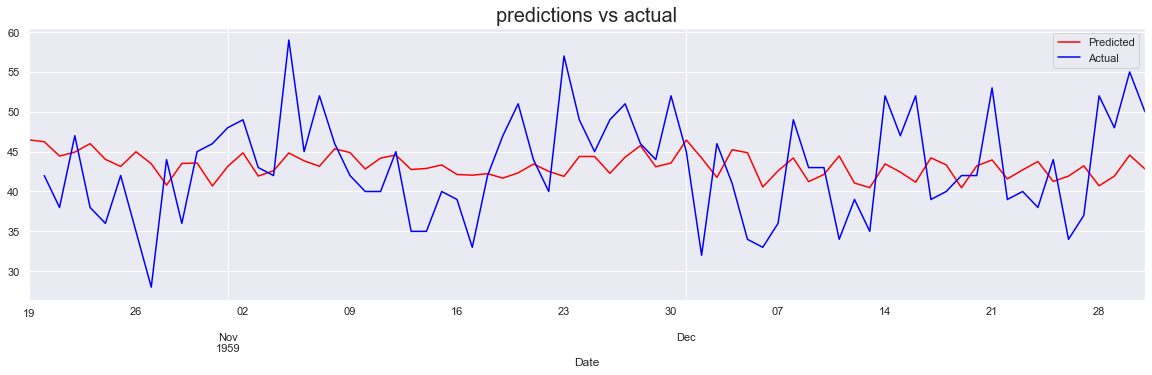

In [84]:
df_pred[start_date:end_date].plot(figsize=(20,5),color='red')
df_test.Births[start_date:end_date].plot(color='blue')
plt.title('predictions vs actual',size=20)
plt.legend(['Predicted','Actual'])
plt.show()

In [85]:
## this shows our predicted model could not capture the rise and falls in the actual value
## it almost shows the mean value around the actual value 


In [97]:
## feature extraction

In [89]:
df_copy_2 = raw_data.copy()

In [91]:
df_copy_2['Date']=pd.to_datetime(df_copy_2['Date'])

In [95]:
df_copy['month']=df_copy_2['Date'].dt.month.values

In [96]:
df_copy.head()

,Births,month
Date,,
1959-01-01,35,1
1959-01-02,32,1
1959-01-03,30,1
1959-01-04,31,1
1959-01-05,44,1


In [98]:
def month_feature(month):
    if month==9 or month==10 or month==11:
        return 1
    else:
        return 0

In [100]:
df_copy['month_feature']=df_copy['month'].apply(month_feature)

In [102]:
df_copy.tail()

,Births,month,month_feature
Date,,,
1959-12-27,37,12,0
1959-12-28,52,12,0
1959-12-29,48,12,0
1959-12-30,55,12,0
1959-12-31,50,12,0


In [103]:
df = df_copy[['Births','month_feature']].iloc[:size]
df_test = df_copy[['Births','month_feature']].iloc[size:]

In [105]:
## including month_feature as exogenous variable 

In [108]:
model_ar_3_ma_3_Xm = ARIMA(df.Births,exog=df['month_feature'].values,order=(3,0,3))
result_ar_3_ma_3_Xm=model_ar_3_ma_3_Xm.fit()
result_ar_3_ma_3_Xm.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                  292
Model:                     ARMA(3, 3)   Log Likelihood                -979.522
Method:                       css-mle   S.D. of innovations              6.880
Date:                Tue, 26 Jan 2021   AIC                           1977.044
Time:                        11:31:21   BIC                           2010.135
Sample:                    01-01-1959   HQIC                          1990.299
                         - 10-19-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.6024      0.694     58.515      0.000      39.242      41.962
x1               6.5200      1.642      3.971      0.000       3.302       9.738
ar.L1.Births     0.4454      0.033     13.682      0.000       0.382       0.509
ar.L2.Births    -0.4369      0.029    -14.956      0.000      -0.494      -0.380
ar.L3.Births     0.9536      0.032     30.082      0.000       0.891       1.016
ma.L1.Births    -0.3868      0.032    -12.271      0.000      -0.449      -0.325
ma.L2.Births     0.4261      0.023     18.216      0.000       0.380       0.472
ma.L3.Births    -0.9752      0.033    -29.385      0.000      -1.040      -0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0153           -0.0000j            1.0153           -0.0000
AR.2           -0.2786           -0.9773j            1.0163           -0.2942
AR.3           -0.2786           +0.9773j            1.0163            0.2942
MA.1           -0.2942           -0.9557j            1.0000           -0.2975
MA.2           -0.2942           +0.9557j            1.0000            0.2975
MA.3            1.0254           -0.0000j            1.0254           -0.0000
-----------------------------------------------------------------------------
"""

In [109]:
## this shows all the coeff are significant ,, seems like a good choice

In [110]:
print(f'ARMA(3,3) LLF: {result_ar_3_ma_3.llf} AIC:{result_ar_3_ma_3.aic}')
print(f'ARMAX(3,3) LLF: {result_ar_3_ma_3_Xm.llf} AIC:{result_ar_3_ma_3_Xm.aic}')

ARMA(3,3) LLF: -1226.2081890231548 AIC:2468.4163780463095
ARMAX(3,3) LLF: -979.5220532157739 AIC:1977.0441064315478


In [111]:
## ARMA(3,3) has low AIC and Higher LLF than ARMA(3,3) - thus is a better model than ARMA(3,3)

In [112]:
## use LLR test to verify this
llr_test(model_ar_3_ma_3, model_ar_3_ma_3_Xm)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


0.0

In [113]:
## thus, adding an Exogenous variable is indeed useful for this analysis

In [114]:
## let us make prediciton using ARMAX(3,3)

In [116]:
df_pred_x = result_ar_3_ma_3_Xm.predict(start_date,end_date,exog = df_test['month_feature'])

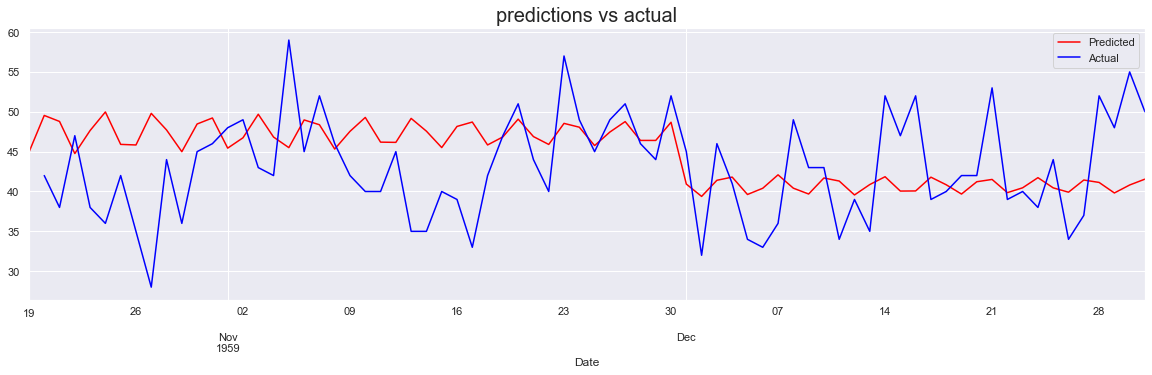

In [117]:
## plotting the result

df_pred_x[start_date:end_date].plot(figsize=(20,5),color='red')
df_test.Births[start_date:end_date].plot(color='blue')
plt.title('predictions vs actual',size=20)
plt.legend(['Predicted','Actual'])
plt.show()

### AUTO-ARIMA without Exogenous Variable 

In [118]:
df.head()

,Births,month_feature
Date,,
1959-01-01,35,0
1959-01-02,32,0
1959-01-03,30,0
1959-01-04,31,0
1959-01-05,44,0


In [132]:
df_test.head()

,Births,month_feature
Date,,
1959-10-20,42,1
1959-10-21,38,1
1959-10-22,47,1
1959-10-23,38,1
1959-10-24,36,1


In [133]:
start_train = '1959-01-01'
end_train = '1959-10-19'

start_date = '1959-10-20'

In [187]:
model_auto = auto_arima(df.Births[start_train:end_train],max_p=15,max_q=15,seasonal=False,stationary=True)
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods=len(df_test[start_date:end_date]),index=df_test[start_date:end_date].index))
# df_auto_pred.plot(figsize=(20,5),color='red')


In [188]:
df_auto_pred['actual_births'] = df_test['Births'].values

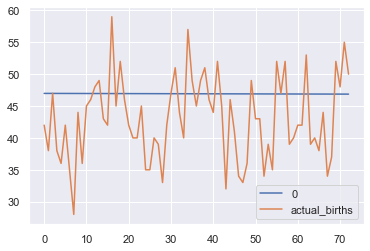

In [189]:
df_auto_pred.plot()

In [180]:
## could not predict maybe because we have too few data ??

In [190]:
## lets fit SARIMAX model

In [207]:
model_sarimax = SARIMAX(df.Births,order=(3,0,3),exog=df.month_feature.values)
result_sarimax=model_sarimax.fit()
result_sarimax.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  292
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -986.565
Date:                Tue, 26 Jan 2021   AIC                           1989.130
Time:                        12:41:06   BIC                           2018.544
Sample:                    01-01-1959   HQIC                          2000.912
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.4921      1.867      2.406      0.016       0.833       8.152
ar.L1          2.0910      0.021     97.486      0.000       2.049       2.133
ar.L2         -2.0814      0.040    -52.112      0.000      -2.160      -2.003
ar.L3          0.9904      0.026     37.675      0.000       0.939       1.042
ma.L1         -2.0372      0.107    -18.996      0.000      -2.247      -1.827
ma.L2          2.0320      0.292      6.962      0.000       1.460       2.604
ma.L3         -0.9604      0.185     -5.190      0.000      -1.323      -0.598
sigma2        48.7117      8.912      5.466      0.000      31.245      66.179
===================================================================================
Ljung-Box (Q):                       44.75   Jarque-Bera (JB):                15.58
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.54
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [208]:
output_pred = result_sarimax.predict(start_date,end_date,exog=df_test.month_feature.values)

In [209]:
df_compare = pd.DataFrame(output_pred, columns=['predicted_births'])


In [210]:
df_compare['actual_birth'] = df_test.Births

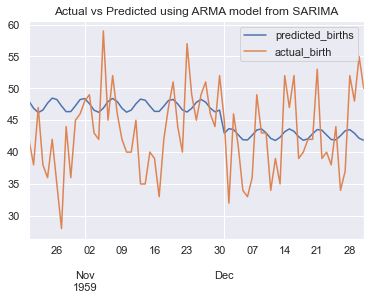

In [211]:
df_compare.plot(title='Actual vs Predicted using ARMA model from SARIMA')
plt.show()

In [212]:
df_compare

,predicted_births,actual_birth
1959-10-20,47.991726,42
1959-10-21,46.865301,38
1959-10-22,46.203394,47
1959-10-23,46.594482,38
1959-10-24,47.674343,36
...,...,...
1959-12-27,43.337348,37
1959-12-28,43.518928,52
1959-12-29,42.958948,48
1959-12-30,42.165758,55
